# Load modules 

In [3]:
import sklearn

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
# from sklearn.metrics import explained_variance_score
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.grid_search import GridSearchCV
# from sklearn.cross_validation import KFold
import pickle5 as Pickle

### Import data and split into train - test 

In [12]:
df1 = pd.read_csv(r"C:\Users\rmcgr\ntg_repository\tern\outputs\indices.csv", header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
#df = df[(df['chm'] >= 0.52)]
print(list(df1))
#df2 = df1[(df1['chm'] >= 5.0)]
#df = df1.sample(200000)
df1.shape

(21, 55)
['Unnamed: 0', 'site', 'total_agb', 'psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']


(21, 55)

In [ ]:
#df3 = df1[(df1['chm'] > 4)]
#df1 = df3

In [14]:
#print (df1.comp.unique())

In [15]:
df = df1

In [16]:
#df1a = df1.replace([np.inf, -np.inf], np.nan).copy()

#df2 = df1a.dropna()
#print df2.shape

In [21]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
ydata1 = df[['total_agb']].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.80)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(16, 52) (16,)
(5, 52) (5,)


### Plot up Histograms of Lidar meanCHM for train and test datasets

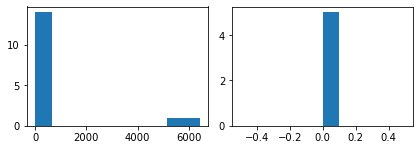

In [22]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [17]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
rfrModel_1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x0000000012295AF8>)

In [18]:
rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
rfrModel_1,

(GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
              max_depth=1, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),)

In [19]:
rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
rfrModel_1,

(ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=1, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False),)

In [25]:
rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
rfrModel_1,

(RandomForestRegressor(max_features='log2', min_samples_split=1.0, n_jobs=-1,
                       oob_score=True),)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [26]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = -0.00
Fitted model mse = 3822672.79
n = 16


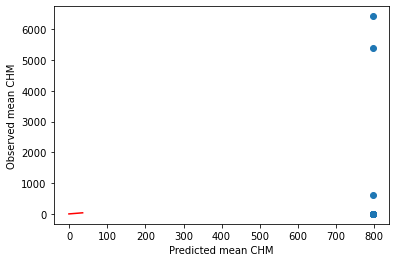

In [30]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
#x = [-1,35]
#y = [-1,35]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed mean CHM')

plt.xlabel('Predicted mean CHM')

# 1 for 1 line

plt.plot(x, y, color = 'r')
plt.show()

         band    n
0       psB1a  0.0
1       psB2a  0.0
28    GNDVIfa  0.0
29     GNDVIa  0.0
30      CVIfa  0.0
31       CVIa  0.0
32     NDGIfa  0.0
33      NDGIa  0.0
34       RIfa  0.0
35        RIa  0.0
36      NBRfa  0.0
37       NBRa  0.0
38     NDIIfa  0.0
39      NDIIa  0.0
40     GDVIfa  0.0
41      GDVIa  0.0
42    MSAVIfa  0.0
43     MSAVIa  0.0
44      DVIfa  0.0
45       DVIa  0.0
46     SAVIfa  0.0
47      SAVIa  0.0
48     NDVIfa  0.0
49      NDVIa  0.0
50      MSRfa  0.0
27     GSAVIa  0.0
26    GSAVIfa  0.0
25   ratio65a  0.0
12  ratio62fa  0.0
2       psB3a  0.0
3       psB4a  0.0
4       psB5a  0.0
5       psB6a  0.0
6   ratio32fa  0.0
7   ratio42fa  0.0
8   ratio43fa  0.0
9   ratio52fa  0.0
10  ratio53fa  0.0
11  ratio54fa  0.0
13  ratio63fa  0.0
24   ratio64a  0.0
14  ratio64fa  0.0
15  ratio65fa  0.0
16   ratio32a  0.0
17   ratio42a  0.0
18   ratio43a  0.0
19   ratio52a  0.0
20   ratio53a  0.0
21   ratio54a  0.0
22   ratio62a  0.0
23   ratio63a  0.0
51       MSR

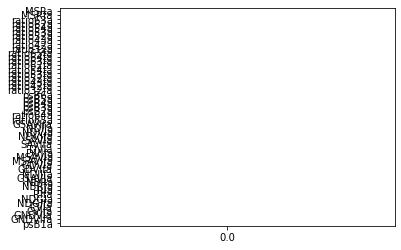

In [37]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df = pd.DataFrame(dict(band=band,n=score))
#print(df)
df['n'].astype('float')
#df.convert_objects(convert_numeric=True).dtypes()
#ind = np.arange(len(df))
dfsort = df.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
 
dfsort2 = df.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df)])
plt.show()
fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

Predicted data r2 = 0.76864310093
MSE = 2.765
RMSE = 1.663
bias = -0.011
n = 37713


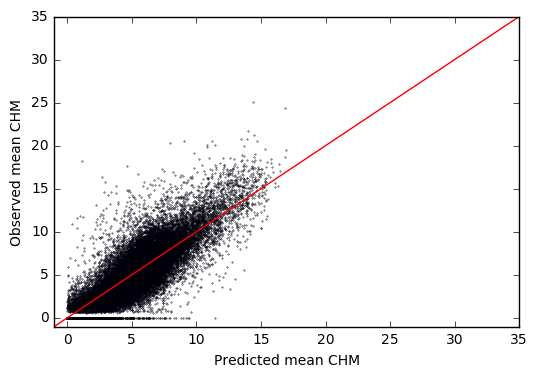

In [24]:
y2_predict = rfrLCHM.predict(X_2)

print 'Predicted data r2 =', rfrLCHM.score(X_2, y_2)
print 'MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f')
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print 'bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f')
print 'n =' , len(y_2)

plt.scatter(y2_predict, y_2 ,s=0.1, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,35]
y = [-1,35]

#sets the limits of the axis
plt.xlim(-1,35)
plt.ylim(-1,35)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
plt.plot(x, y, color = 'r')

plt.show()

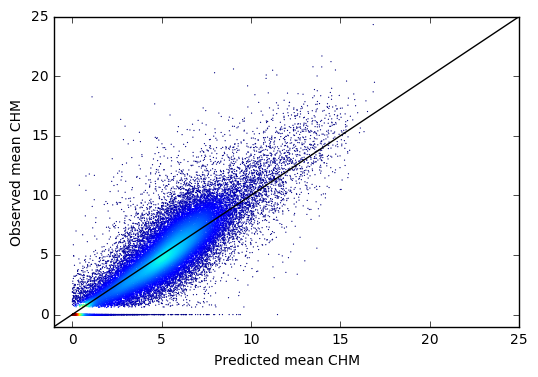

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# data for the 1 for 1 line
a = [-1,25]
b = [-1,25]

#sets the limits of the axis
plt.xlim(-1,25)
plt.ylim(-1,25)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import cPickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    cPickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv('combined_val_data_l5_l7_l8.csv', header=0)
print df.shape 

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['chm'] >= 4)]

print (df1.shape)

In [ ]:
xdata2 = df1[['dem', 'ratio42', 'psB5', 'CVI', 'ratio43', 'psB2', 'ratio54', 'SAVI', 'ratio53', 'ratio52', 'psB3', 'GSAVI', 'ratio65', 'ratio63', 'ratio62', 'psB4', 'ratio32']].astype('float32')

ydata1 = df1[['chm']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print len(ydata1)

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()